# Visualizing Two Quantitative Variables

1 Introduction to relational plots and subplots

2 Customizing scatter plots

3 Introduction to line plots

Many questions in data science are centered around describing the relationship between two quantitative variables. Seaborn calls plots that visualize this relationship "relational plots".

While looking at a relationship between two variables at a high level is often informative, sometimes we suspect that the relationship may be different within certain subgroups. 

## 1.1 Introduction to relational plots and subplots

"relplot()" stands for "relational plot" and enables you to visualize the relationship between two quantitative variables using either scatter plots or line plots. Using "relplot()" gives us a big advantage: the ability to create subplots in a single figure. Because of this advantage, we use "relplot()" instead of "scatterplot"

### scatterplot() vs. relplot()

Let's return to our scatter plot of total bill versus tip amount from the tips dataset. 

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataset
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

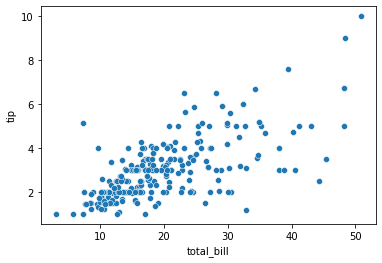

In [5]:
# plot total bill vs tip using a scatter plot
sns.scatterplot(x='total_bill', y='tip', data=tips)

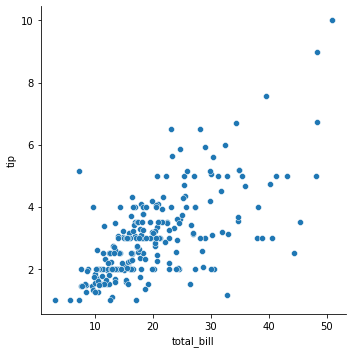

In [8]:
# plot total bill vs tip using a relplot()

sns.relplot(x='total_bill', y='tip', data=tips, kind='scatter')

### Subplots in columns
By setting "col" equal to "smoker", we get a separate scatter plot for smokers and non-smokers, arranged horizontally in columns.

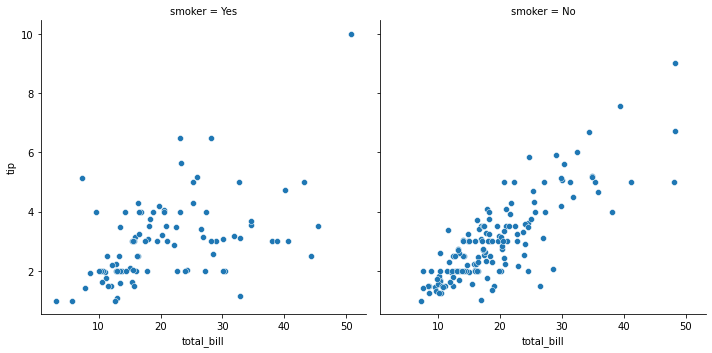

In [9]:
sns.relplot(x='total_bill', y='tip', data=tips, kind='scatter', col='smoker')

### Subplots in rows
If you want to arrange these vertically in rows instead, you can use the "row" parameter instead of "col".

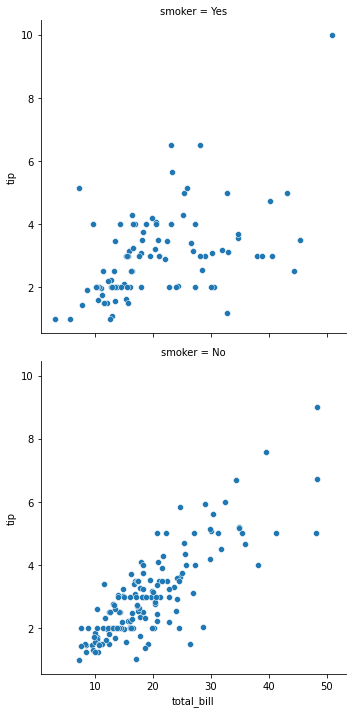

In [10]:
sns.relplot(x='total_bill', y='tip', data = tips, kind='scatter', row='smoker')

### Subplots in rows and columns
It is possible to use both "col" and "row" at the same time. Here, we set "col" equal to smoking status and "row" equal to the time of day (lunch or dinner). Now we have a subplot for each combination of these two categorical variables.

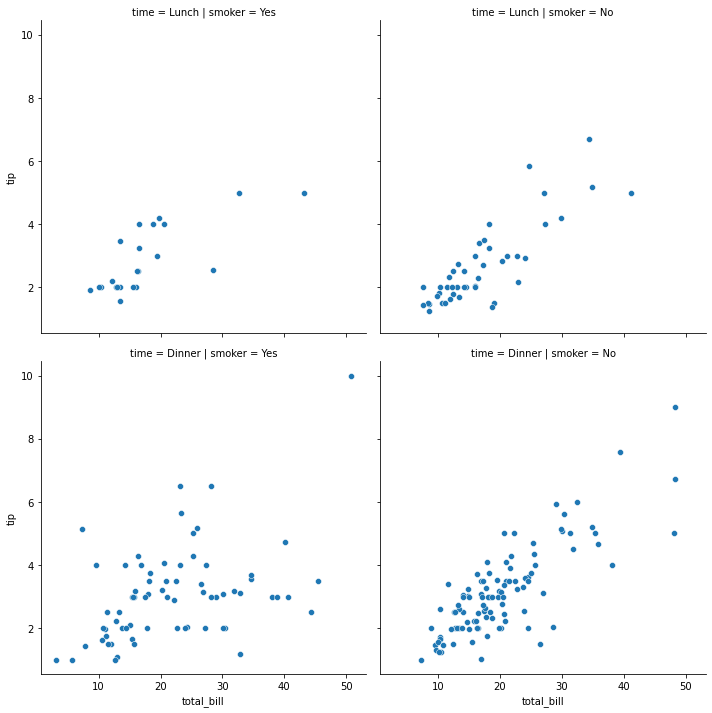

In [11]:
sns.relplot(x='total_bill', y='tip', data = tips, kind='scatter', col='smoker', row= 'time')

### Subgroups for days of the week
As another example, let's look at subgroups based on day of the week. There are four subplots here, which can be a lot to show in a single row. To address this, you can use the "col_wrap" parameter to specify how many subplots you want per row.

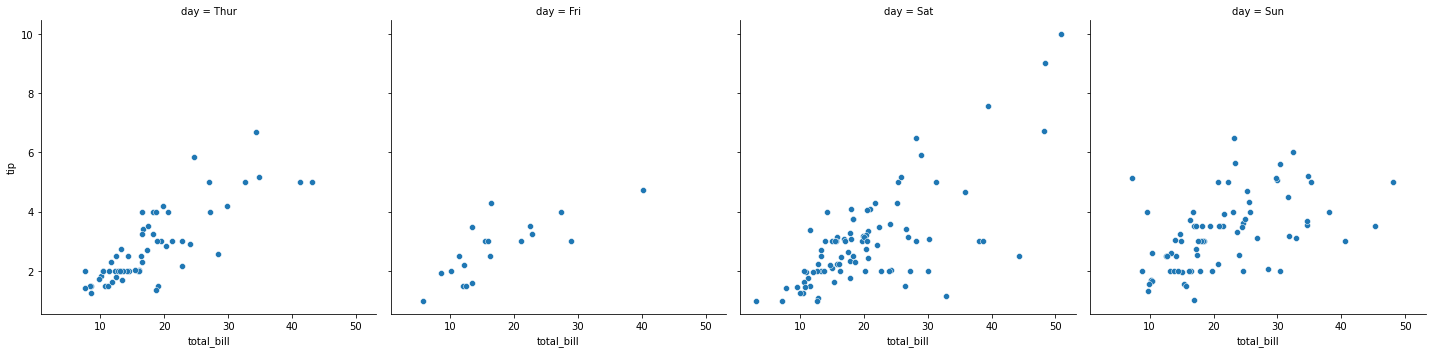

In [12]:
sns.relplot(x='total_bill', y='tip', data = tips, kind='scatter', col='day')

### Wrapping columns

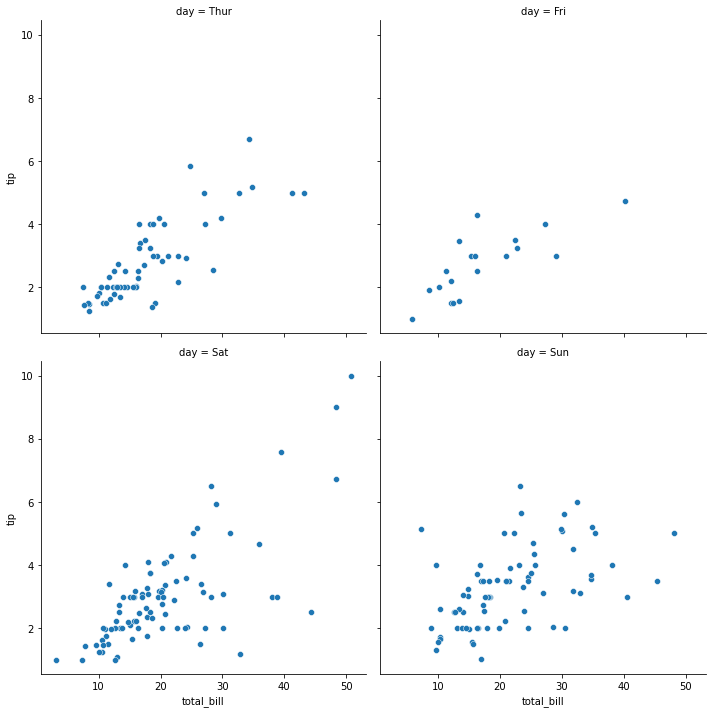

In [14]:
# wrapping the images
# Here, we set "col_wrap" equal to two plots per row.
sns.relplot(x='total_bill', y='tip', data = tips, kind='scatter', col='day', col_wrap=2)

### Ordering columns
We can also change the order of the subplots by using the "col_order" and "row_order" parameters and giving it a list of ordered values.

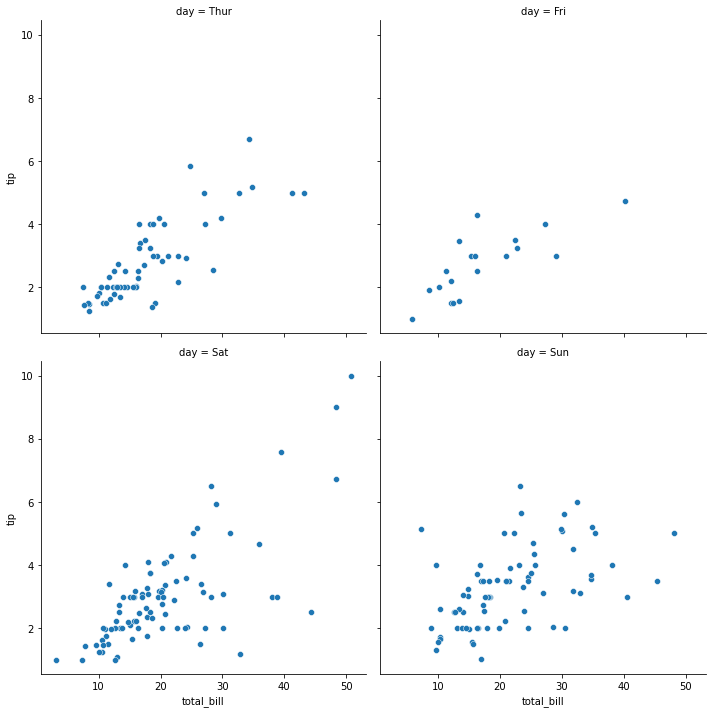

In [15]:
sns.relplot(x='total_bill', y='tip', data = tips, kind='scatter', col='day', col_wrap=2, col_order=['Thur','Fri','Sat','Sun'])

In [17]:
students = pd.read_csv('student-alcohol-consumption.csv', index_col=0)
students.head()

,school,sex,age,famsize,Pstatus,Medu,Fedu,traveltime,failures,schoolsup,...,goout,Dalc,Walc,health,absences,G1,G2,G3,location,study_time
0,GP,F,18,GT3,A,4,4,2,0,yes,...,4,1,1,3,6,5,6,6,Urban,2 to 5 hours
1,GP,F,17,GT3,T,1,1,1,0,no,...,3,1,1,3,4,5,5,6,Urban,2 to 5 hours
2,GP,F,15,LE3,T,1,1,1,3,yes,...,2,2,3,3,10,7,8,10,Urban,2 to 5 hours
3,GP,F,15,GT3,T,4,2,1,0,no,...,2,1,1,5,2,15,14,15,Urban,5 to 10 hours
4,GP,F,16,GT3,T,3,3,1,0,no,...,2,1,2,5,4,6,10,10,Urban,2 to 5 hours


### Creating subplots with col and row

Students with more absences ("absences") tend to have lower final grades ("G3"). Does this relationship hold regardless of how much time students study each week?

To answer this, we'll look at the relationship between the number of absences that a student has in school and their final grade in the course, creating separate subplots based on each student's weekly study time ("study_time").

<AxesSubplot:xlabel='absences', ylabel='G3'>

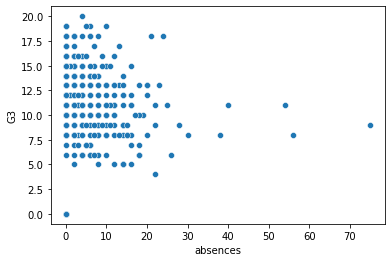

In [19]:
# using sns.scatterplot()
sns.scatterplot(x="absences", y="G3", data=students)

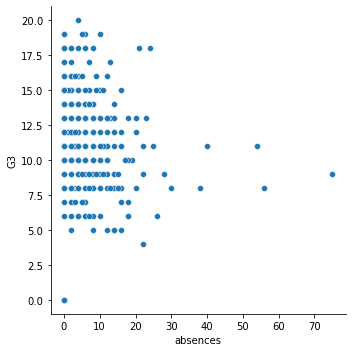

In [20]:
# using relplot

sns.relplot(x='absences', y='G3', data =students, kind='scatter')

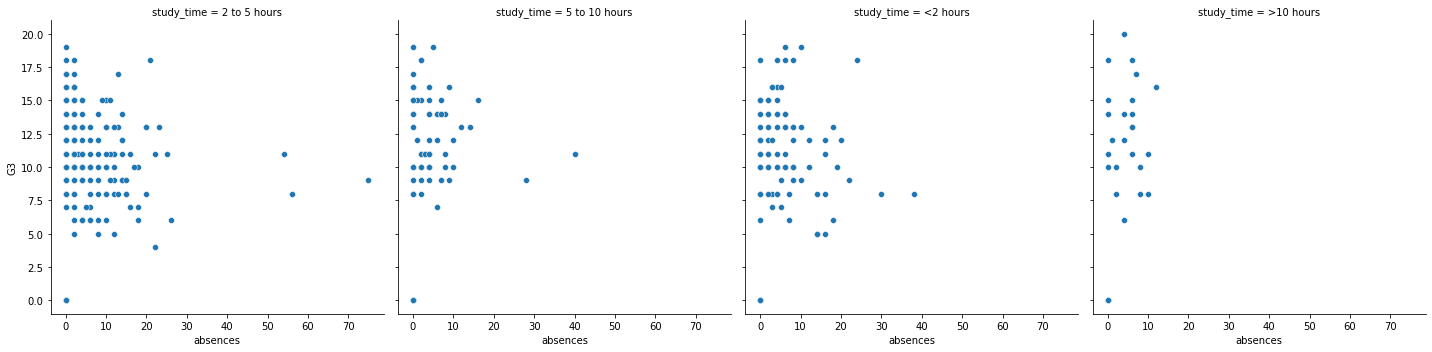

In [22]:
# Modify the code to create one scatter plot for each level of the variable "study_time", arranged in columns.
sns.relplot(x='absences', y='G3', data =students, kind='scatter', col='study_time')

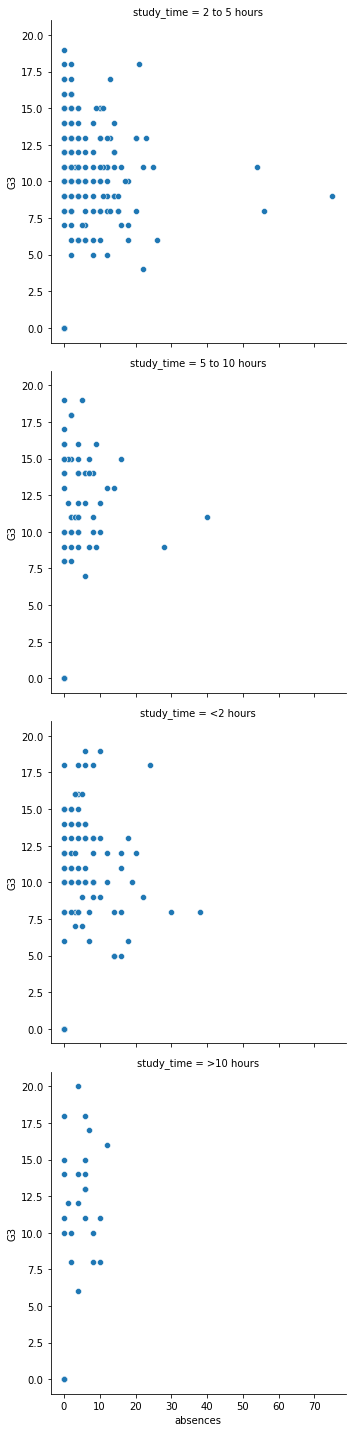

In [23]:
# Adapt your code to create one scatter plot for each level of a student's weekly study time, this time arranged in rows.
sns.relplot(x='absences', y='G3', data =students, kind='scatter', row='study_time')

### Creating two-factor subplots
We want to answer the following question: does a student's first semester grade ("G1") tend to correlate with their final grade ("G3")?

There are many aspects of a student's life that could result in a higher or lower final grade in the class. For example, some students receive extra educational support from their school ("schoolsup") or from their family ("famsup"), which could result in higher grades. Let's try to control for these two factors by creating subplots based on whether the student received extra educational support from their school or family.


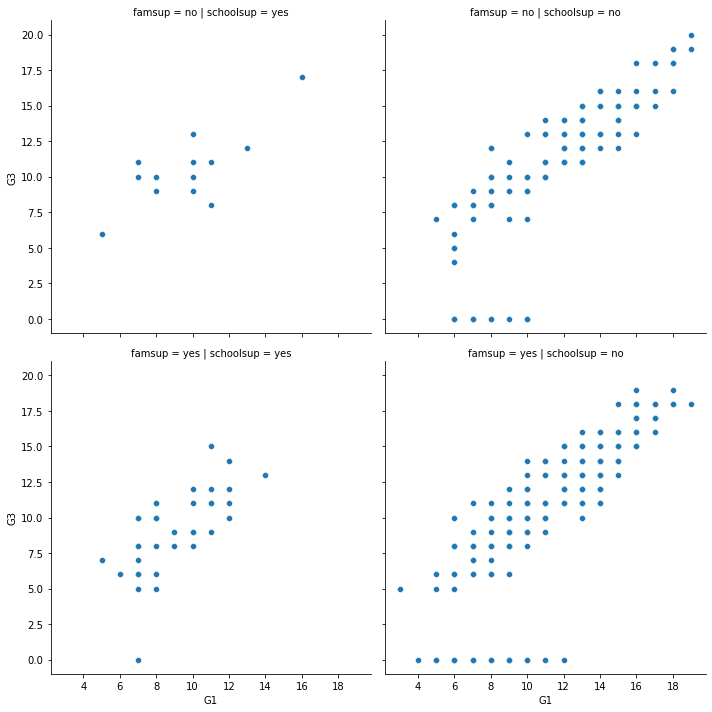

In [24]:
# Use relplot() to create a scatter plot with "G1" on the x-axis and "G3" on the y-axis, using the student_data DataFrame.
sns.relplot(x='G1', y='G3', data=students, kind= 'scatter', col= 'schoolsup', row='famsup')

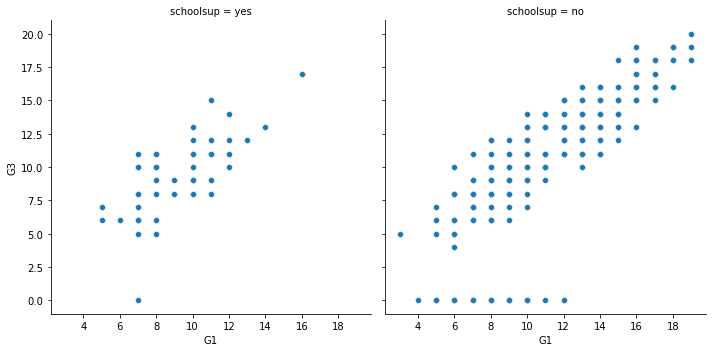

In [25]:
# Create column subplots based on whether the student received support from the school ("schoolsup"), ordered so that "yes" comes before "no"
sns.relplot(x='G1', y='G3', data=students, kind= 'scatter', col= 'schoolsup', col_order=['yes','no'])


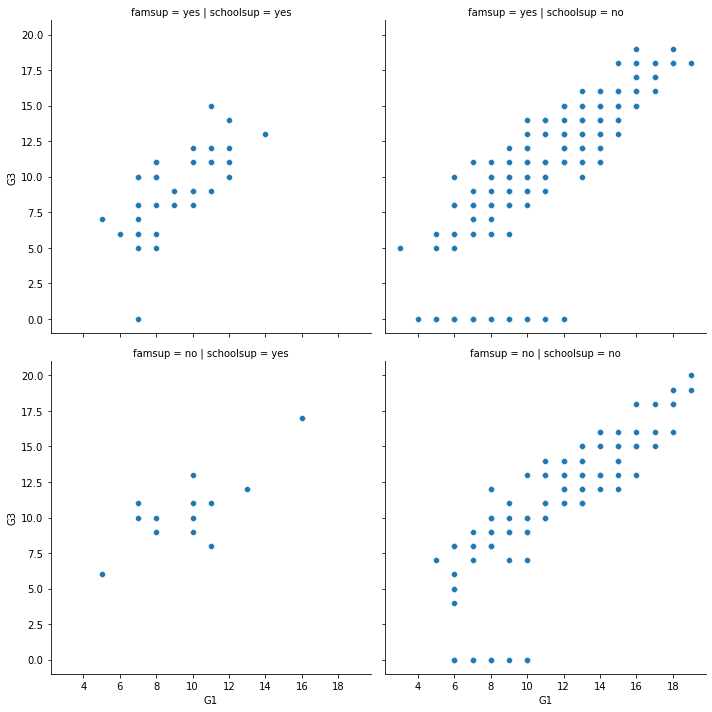

In [26]:
# Add row subplots based on whether the student received support from the family ("famsup"), ordered so that "yes" comes before "no". This will result in subplots based on two factors.

sns.relplot(x='G1', y='G3', 
            data=students,
            kind='scatter', 
            col='schoolsup',
            col_order=['yes', 'no'],
            row='famsup',
            row_order=['yes', 'no'])


## 1.2 Customizing Scatter Plots

Scatter plots are a great tool for visualizing the relationship between two quantitative variables.

subplots(col, row)

subgroups with color (hue)

 In addition to these, Seaborn allows you to add more information to scatter plots by varying the size, the style, and the transparency of the points. All of these options can be used in both the "scatterplot( )" and "relplot( )" functions. We'll use the tips dataset to learn how to use each customization and cover best practices for deciding which customizations to use.

### Subgroups with point size

We're creating a scatter plot of total bill versus tip amount. We want each point on the scatter plot to be sized based on the number of people in the group, with larger groups having bigger points on the plot. To do this, we'll set the "size" parameter equal to the variable name "size" from our dataset. As this example demonstrates, varying point size is best used if the variable is either a quantitative variable or a categorical variable that represents different levels of something, like "small", "medium", and "large". This plot is a bit hard to read because all of the points are of the same color.

In [27]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


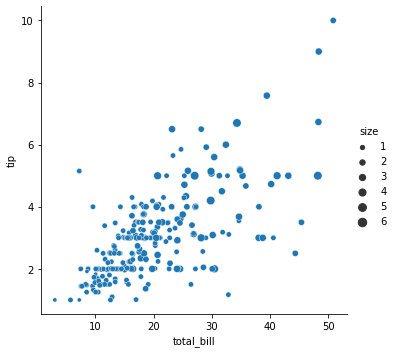

In [28]:
sns.relplot(x='total_bill', y='tip', data=tips, kind='scatter',size='size')

### Point size and hue
We can make it easier by using the "size" parameter in combination with the "hue" parameter. To do this, set "hue" equal to the variable name "size". Notice that because "size" is a quantitative variable, Seaborn will automatically color the points different shades of the same color instead of different colors per category value like we saw in previous plots. Now larger groups have both larger and darker points, which provides better contrast and makes the plot easier to read.

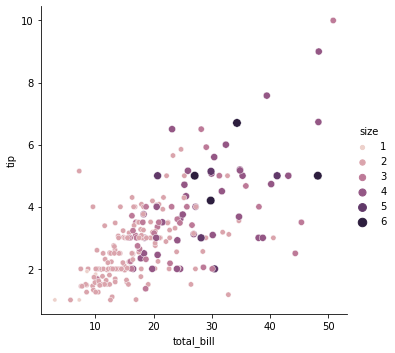

In [29]:
sns.relplot(x='total_bill', y='tip', data=tips, kind='scatter',size='size',hue='size')

### Subgroups with point style
Setting the "style" parameter to a variable name will use different point styles for each value of the variable. Here's a scatter plot we've seen before, where we use "hue" to create different colored points based on smoking status. Setting "style" equal to "smoker" allows us to better distinguish these subgroups by plotting smokers with a different point style in addition to a different color.

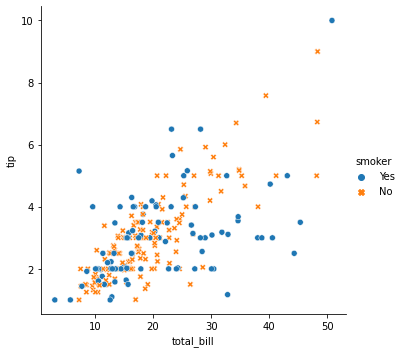

In [31]:
sns.relplot(x='total_bill', y='tip', data=tips, kind='scatter',hue='smoker', style='smoker')

### Changing point transparency
Setting the "alpha" parameter to a value between 0 and 1 will vary the transparency of the points in the plot, with 0 being completely transparent and 1 being completely non-transparent. Here, we've set "alpha" equal to 0.4. This customization can be useful when you have many overlapping points on the scatter plot, so you can see which areas of the plot have more or less observations.

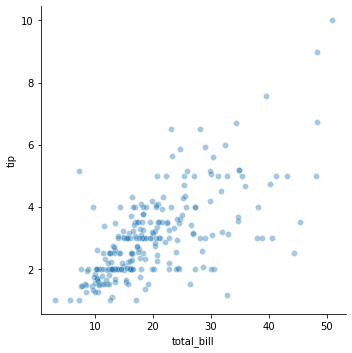

In [32]:
sns.relplot(x='total_bill', y='tip', data=tips, kind='scatter',alpha=0.4)

## 1.3 Introduction to Line Plots
In Seaborn, we have two types of relational plots: scatter plots and line plots. While each point in a scatter plot is assumed to be an independent observation, line plots are the visualization of choice when we need to track the same thing over time. A common example is tracking the value of a company's stock over time. By specifying "kind" equals "line", we can create a line plot.



### Multiple observations per x-value
Line plots can also be used when you have more than one observation per x-value. If a line plot is given multiple observations per x-value, it will aggregate them into a single summary measure. By default, it will display the mean. Notice that Seaborn will automatically calculate a confidence interval for the mean, displayed by the shaded region. This confidence interval tells us that based on our sample, we can be 95% confident that the average sample is within this range. Confidence intervals indicate the uncertainty we have about what the true mean is.

### Replacing confidence interval with standard deviation
Instead of visualizing a confidence interval, we may want to see how varied the measurements. To visualize this, set the "ci" parameter equal to the string "sd" to make the shaded area represent the standard deviation, which shows the spread of the distribution of observations at each x value.

### Turning off confidence interval
We can also turn off the confidence interval by setting the "ci" parameter equal to "None".

In [35]:
# load dataset
mpg = pd.read_csv('mpg.csv')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


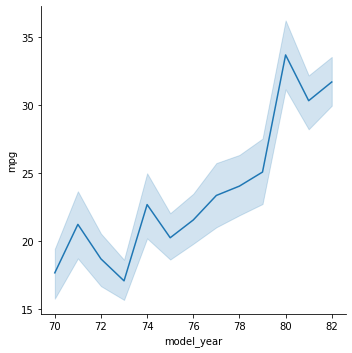

In [36]:
# Use relplot() and the mpg DataFrame to create a line plot with "model_year" on the x-axis and "mpg" on the y-axis.
sns.relplot(x='model_year', y='mpg', data=mpg, kind='line')

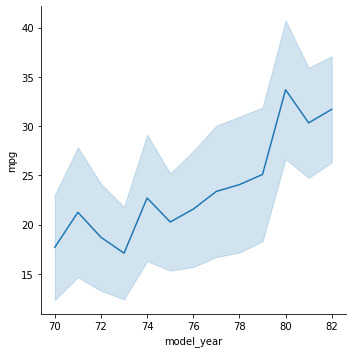

In [37]:
# Change the plot so the shaded area shows the standard deviation instead of the confidence interval for the mean.
sns.relplot(x='model_year', y='mpg', data=mpg, kind='line', ci='sd')

### Plotting subgroups in line plots
We've seen that the average miles per gallon for cars has increased over time, but how has the average horsepower for cars changed over time? And does this trend differ by country of origin?

### Plotting subgroups in line plots
Use relplot( ) and the mpg DataFrame to create a line plot with "model_year" on the x-axis and "horsepower" on the y-axis. Turn off the confidence intervals on the plot

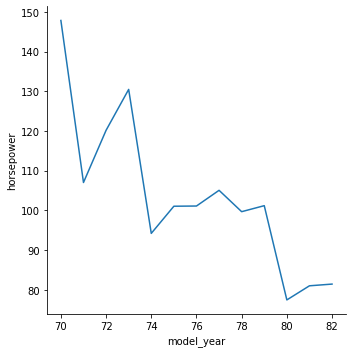

In [42]:
# Use relplot() and the mpg DataFrame to create a line plot with "model_year" on the x-axis and "horsepower" on the y-axis.
#  Turn off the confidence intervals on the plot.
sns.relplot(x='model_year', y='horsepower', data=mpg, kind='line', ci=None)

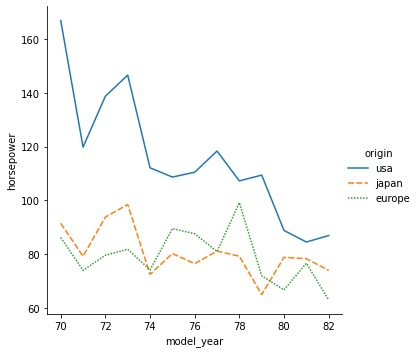

In [45]:
# Create different lines for each country of origin ("origin") that vary in both line style and color.
sns.relplot(x='model_year', y='horsepower', data=mpg, kind='line', style='origin', hue='origin', ci=None)

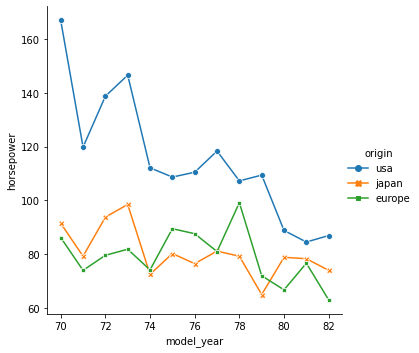

In [46]:
# Add markers for each data point to the lines.
# Use the dashes parameter to use solid lines for all countries, while still allowing for different marker styles for each line.
sns.relplot(x='model_year', y='horsepower', data=mpg, kind='line', style='origin', hue='origin', markers=True, dashes=False, ci=None)
